In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso

## Problem Statement 
We a want to make a predictive model that will predict prices of cars based on the following features below

**Data Features**
- Levy
- Manufacturer
- Model
- Prod_year
- Category
- Leather_interior
- Fuel_type
- Engine_volume
- Mileage
- Cylinders
- Gear_box_type
- Drive_wheels
- Doors
- Wheel
- Color
- Airbags
- Car_age

### Work Flow
> Data PreProcessing

> Data train and split 

> Use linear and Lasso regression 

> Compare the results

In [2]:
data= pd.read_csv("data/car_price_prediction.csv")

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
rename_dict = {
    col: col.replace(' ', '_').replace('.', '')
    for col in data.columns
}

# Rename the columns using the rename() method
data = data.rename(columns=rename_dict)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod_year         19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather_interior  19237 non-null  object 
 8   Fuel_type         19237 non-null  object 
 9   Engine_volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear_box_type     19237 non-null  object 
 13  Drive_wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
# convert the Mileage column to int
data["Mileage"]= data["Mileage"].str.replace(" km", "")
data["Mileage"]= data["Mileage"].astype(int)

In [7]:
# convert the Engine volume column to float
data["Engine_volume"].unique()
data["Engine_volume"]= data["Engine_volume"].str.replace("Turbo","")
data["Engine_volume"]=data["Engine_volume"].astype(float)

In [8]:
# data["Levy"]= data["Levy"].str.replace("0-0","0")
# data["Levy"].astype(int)

In [9]:
data["Price"].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075], dtype=int64)

In [10]:
# The column doors has been misrepresent as the current year. Leaving no information for doors hence we are going to drop column
data.drop(columns=["Doors"], inplace=True)

# We create a new column show the number of years since production
data["Car_age"]= 2023 - data["Prod_year"]

In [11]:
data

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Wheel,Color,Airbags,Car_age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,Left wheel,Silver,5,24
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,Left wheel,Red,8,12
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,Left wheel,Grey,4,13
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,Left wheel,Black,4,16


In [12]:
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Wheel               0
Color               0
Airbags             0
Car_age             0
dtype: int64

**Checking the distribution of the categorical data**

In [13]:
print(data["Category"].value_counts())
print(data["Manufacturer"].value_counts())
print(data["Fuel_type"].value_counts())
print(data["Gear_box_type"].value_counts())

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64
Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel_type, dtype: int64
Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear_box_type, dtype: int64


### Detecting Outliers


In [14]:
# Calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\HP\AppData\Local\Temp/ipykernel_17644/1856687065.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
# Drop unnecessary columns
data = data.drop(['ID', 'Levy', "Cylinders"], axis=1)

### Encoding the categorical data

In [16]:
# Hot encoding
# data= pd.get_dummies(data, columns=['Manufacturer', 'Fuel_type', 'Gear_box_type','Category','Model', 'Cylinders', 'Drive_wheels', 'Wheel', 'Color','Leather_interior'])

In [17]:
le = LabelEncoder()
data["Manufacturer"]= le.fit_transform(data["Manufacturer"])
data["Model"]= le.fit_transform(data["Model"])
data["Category"]= le.fit_transform(data["Category"])
data["Leather_interior"]= le.fit_transform(data["Leather_interior"])
data["Fuel_type"]= le.fit_transform(data["Fuel_type"])
data["Gear_box_type"]= le.fit_transform(data["Gear_box_type"])
data["Drive_wheels"]= le.fit_transform(data["Drive_wheels"])
data["Wheel"]= le.fit_transform(data["Wheel"])
data["Color"]= le.fit_transform(data["Color"])

<AxesSubplot:>

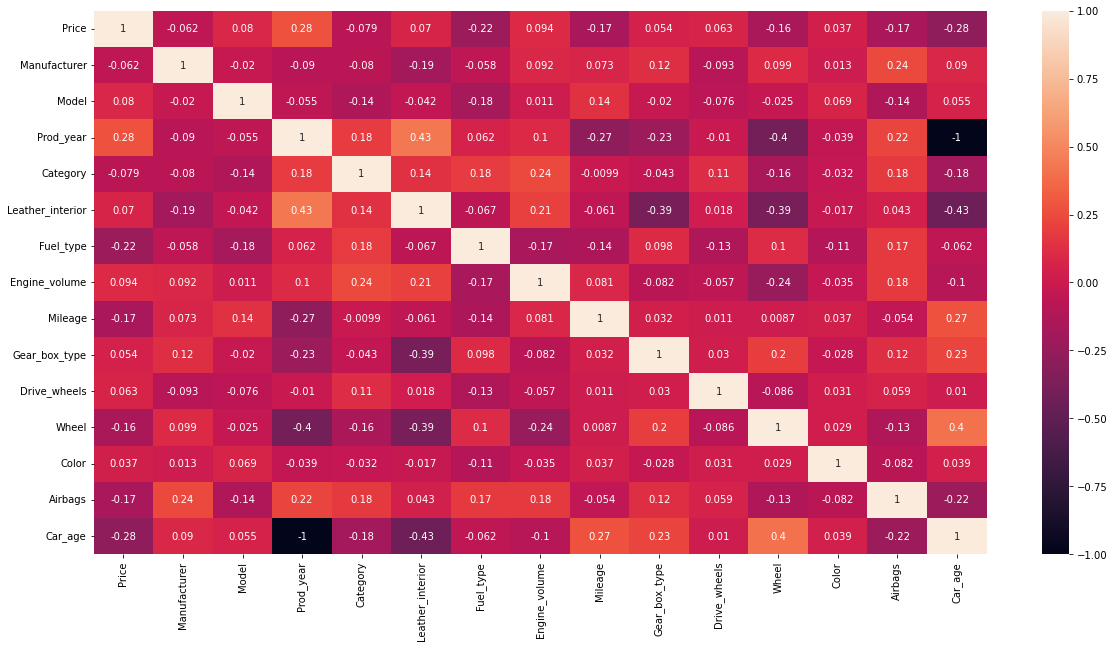

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

**Spliting the data to training and test**

In [19]:
data.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Gear_box_type', 'Drive_wheels', 'Wheel', 'Color', 'Airbags',
       'Car_age'],
      dtype='object')

In [20]:
X= data.drop(['Price'], axis=1)
Y=data["Price"]

In [21]:
print(X.shape)
print(Y.shape)

(10750, 14)
(10750,)


In [22]:
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

### Model Training

1. Linear Regression
2. Lasso Regression

In [23]:
lm= LinearRegression()

In [24]:
print(Xtrain.shape)
print(Ytrain.shape)

(7525, 14)
(7525,)


In [25]:
lm.fit(Xtrain,Ytrain)

LinearRegression()

### Model Evaluation

In [26]:
# We want to see how did out data perform to the actual data
# lm= LinearRegression()
training_data_predictions= lm.predict(Xtrain)

In [27]:
# R squared error
# it should be closer to 1

error_score= r2_score(Ytrain, training_data_predictions)
print("R-square error:", error_score)

R-square error: 0.2499453308442937


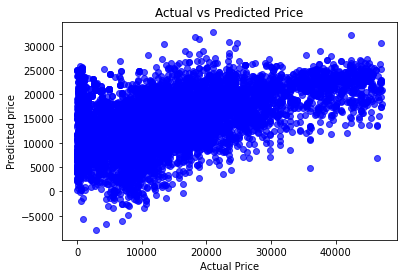

In [28]:
plt.scatter(Ytrain, training_data_predictions, color= "b", alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

In [29]:
test_data_predictions= lm.predict(Xtest)
error_score= r2_score(Ytest, test_data_predictions)
print("R-square error:", error_score)

R-square error: 0.24287102427997498


In [30]:
print(sqrt(mean_squared_error(Ytrain, training_data_predictions)))
print(sqrt(mean_squared_error(Ytest, test_data_predictions)))

9860.461576829553
10207.884689400858


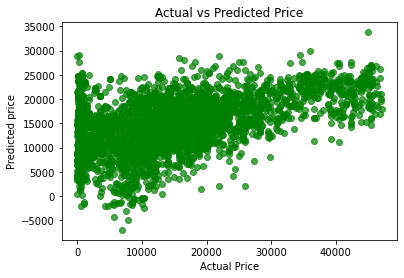

In [31]:
plt.scatter(Ytest, test_data_predictions, color= "green", alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

In [32]:
data.corr()["Price"]

Price               1.000000
Manufacturer       -0.061627
Model               0.080183
Prod_year           0.279732
Category           -0.079344
Leather_interior    0.070030
Fuel_type          -0.219813
Engine_volume       0.094010
Mileage            -0.171307
Gear_box_type       0.053900
Drive_wheels        0.062810
Wheel              -0.159738
Color               0.037060
Airbags            -0.166518
Car_age            -0.279732
Name: Price, dtype: float64

## Lasso Regression

In [33]:
lass= Lasso()

In [34]:
lass.fit(Xtrain,Ytrain)

Lasso()

### Model Evaluation

In [35]:
# We want to see how did out data perform to the actual data
# lm= LinearRegression()
training_data_predictions= lass.predict(Xtrain)

In [36]:
# R squared error
# it should be closer to 1

error_score= r2_score(Ytrain, training_data_predictions)
print("R-square error:", error_score)

R-square error: 0.24994496851496328


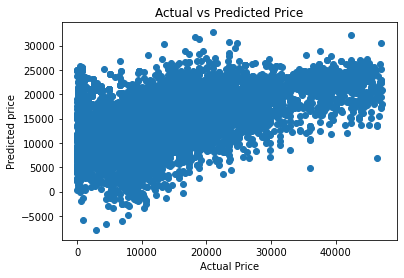

In [37]:
plt.scatter(Ytrain, training_data_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

In [38]:
test_data_predictions= lass.predict(Xtest)
error_score= r2_score(Ytest, test_data_predictions)
print("R-square error:", error_score)

R-square error: 0.24285927791084483


In [39]:
print(sqrt(mean_squared_error(Ytrain, training_data_predictions)))
print(sqrt(mean_squared_error(Ytest, test_data_predictions)))

9860.463958478624
10207.963873476745


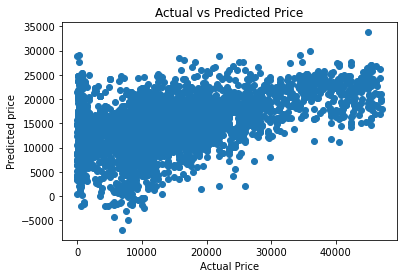

In [40]:
plt.scatter(Ytest, test_data_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()